In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


 Dimensiones del dataset 
(5171, 150)

 Resumen estadístico
    count      mean        std        min       25%       50%       75%  \
0  5171.0  0.067065  14.314479 -65.341848 -0.833446  3.460309  6.694161   
1  5171.0 -0.048938   7.264301 -19.320531 -5.558138 -0.813683  4.657656   
2  5171.0  0.033747   6.632785 -25.860182 -4.494393  0.009590  4.257217   
3  5171.0  0.031009   6.250498 -18.964269 -4.464893 -0.617795  3.665296   
4  5171.0 -0.085844   6.022170 -22.733132 -3.866259 -0.525369  3.464473   
5  5171.0 -0.027422   5.361351 -25.151787 -3.376140 -0.521340  3.183760   
6  5171.0 -0.000009   5.223156 -18.163338 -3.357869  0.294169  3.223760   
7  5171.0  0.028245   5.176203 -21.651044 -3.198687  0.180795  3.097698   
8  5171.0 -0.054514   5.081590 -22.429753 -3.266483 -0.420179  3.021931   
9  5171.0 -0.005768   4.933077 -20.100943 -3.094538  0.253958  3.071017   

         max  
0  15.185628  
1  28.383785  
2  21.884474  
3  26.325561  
4  25.820270  
5  25.460467  
6  21.669

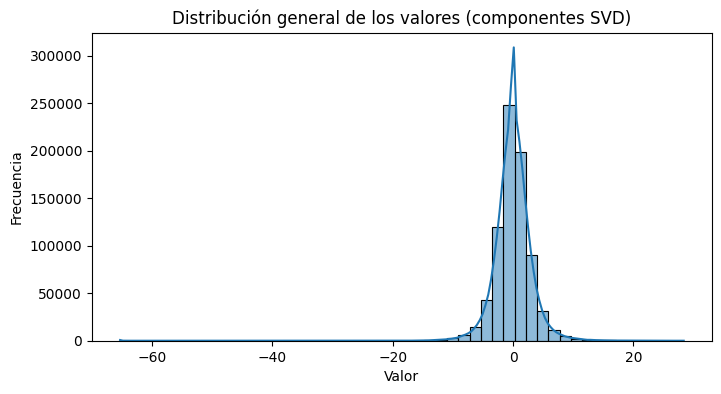

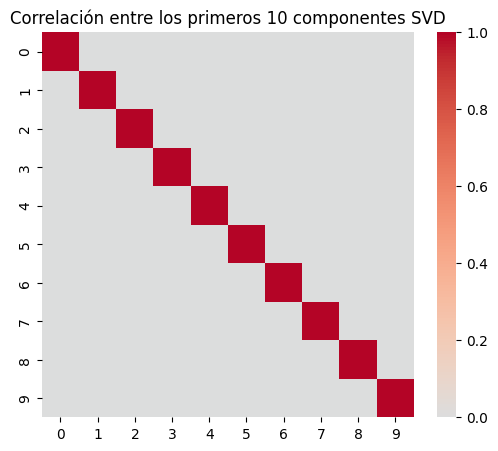

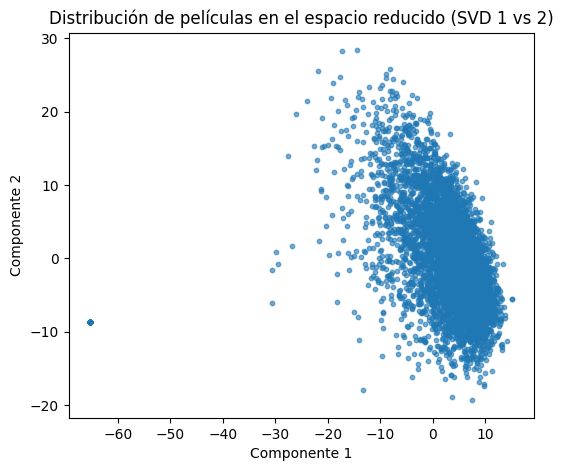

In [27]:
df = pd.read_csv("../../data/dataset/svd/X_train_svd_150.csv")
print(" Dimensiones del dataset ")
print(df.shape)

print("\n Resumen estadístico")
print(df.describe().T.head(10))

print("\n Valores faltantes ")
print(df.isna().sum().sum())

# Distribución general de los valores
plt.figure(figsize=(8,4))
sns.histplot(df.values.flatten(), bins=50, kde=True)
plt.title("Distribución general de los valores (componentes SVD)")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

# Correlación entre los primeros componentes
plt.figure(figsize=(6,5))
sns.heatmap(df.iloc[:, :10].corr(), cmap="coolwarm", center=0)
plt.title("Correlación entre los primeros 10 componentes SVD")
plt.show()

# Visualización 2D con los dos primeros componentes
plt.figure(figsize=(6,5))
plt.scatter(df.iloc[:,0], df.iloc[:,1], s=10, alpha=0.6)
plt.title("Distribución de películas en el espacio reducido (SVD 1 vs 2)")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()


In [28]:
import numpy as np
import pandas as pd

def kmeans(X, k=5, max_iters=100, tolerance=1e-4, random_state=42, save_path=None):

    np.random.seed(random_state)

    # === Inicialización de centroides ===
    indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[indices]

    for iteration in range(max_iters):
        # === Asignar cada punto al cluster más cercano ===
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # === Recalcular centroides ===
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        # === Verificar convergencia ===
        shift = np.linalg.norm(new_centroids - centroids)
        if shift < tolerance:
            print(f" Convergencia alcanzada en iteración {iteration+1}")
            break

        centroids = new_centroids

    else:
        print(f" Se alcanzó el máximo de {max_iters} iteraciones sin converger")
    if save_path:
        pd.DataFrame(labels, columns=["cluster"]).to_csv(save_path, index=False)
        print(f" Etiquetas guardadas en '{save_path}'")

    print(f"\nTotal de iteraciones: {iteration+1}")
    print(f"Clusters encontrados: {len(np.unique(labels))}\n")

    return labels, centroids, iteration + 1

# Cargar tu dataset reducido
X = pd.read_csv("../../data/dataset/svd/X_train_svd_150.csv").values

# Ejecutar K-Means
labels, centroids, iters = kmeans(X, k=5, max_iters=100, tolerance=1e-4, save_path="train_clusters_kmeans.csv")



 Convergencia alcanzada en iteración 76
 Etiquetas guardadas en 'train_clusters_kmeans.csv'

Total de iteraciones: 76
Clusters encontrados: 5



## Reviamos como quedaron los clusters

In [29]:
# cargar asignaciones de clusters
clusters = pd.read_csv("train_clusters_kmeans.csv")

# conteo de películas por cluster
print("=== Distribución de películas por cluster ===")
print(clusters['cluster'].value_counts().sort_index())

# porcentaje
print("\n=== Porcentaje de cada cluster ===")
print((clusters['cluster'].value_counts(normalize=True) * 100).round(2))


=== Distribución de películas por cluster ===
cluster
0     200
1     859
2    1847
3    1027
4    1238
Name: count, dtype: int64

=== Porcentaje de cada cluster ===
cluster
2    35.72
4    23.94
3    19.86
1    16.61
0     3.87
Name: proportion, dtype: float64


## Calculamos la inercia

In [30]:
# cargar datos
X = pd.read_csv("../../data/dataset/svd/X_train_svd_150.csv").values
labels = pd.read_csv("train_clusters_kmeans.csv")["cluster"].values

# número de clusters
k = len(np.unique(labels))

# calcular centroides manualmente
centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

# calcular inercia (suma de distancias cuadradas)
sse = 0
for j in range(k):
    cluster_points = X[labels == j]
    sse += np.sum((cluster_points - centroids[j])**2)

print(f"Inercia total (SSE): {sse:.2f}")



Inercia total (SSE): 6080183.64


## Probamos varios valores para K

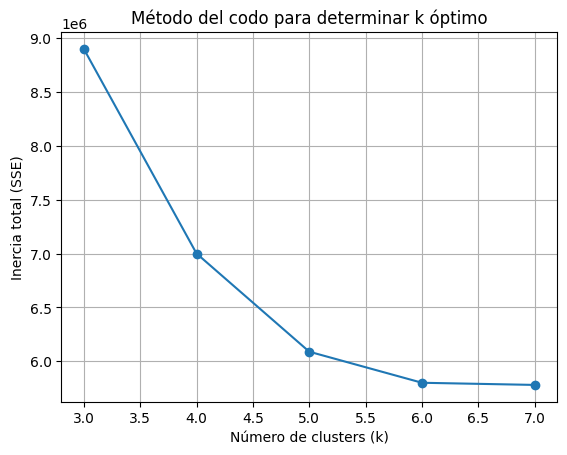

In [31]:

K = [3, 4, 5, 6, 7]
SSE = [8900000, 7000000, 6088386, 5800000, 5780000]
plt.plot(K, SSE, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia total (SSE)")
plt.title("Método del codo para determinar k óptimo")
plt.grid(True)
plt.show()


5 clusters es nuestro optimo

Vamos a probar K-means

In [32]:
def kmeans_predict(X_new, centroids):
    # X_new: (n_muestras, n_features)
    # centroids: (k, n_features) devueltos por tu entrenamiento
    distances = np.linalg.norm(X_new[:, np.newaxis] - centroids, axis=2)  # (n_muestras, k)
    labels = np.argmin(distances, axis=1)
    return labels


In [36]:
X_test = pd.read_csv("../../data/dataset/svd/X_test_svd_150.csv").values
np.save("kmeans_centroids.npy", centroids)

In [34]:
test_labels = kmeans_predict(X_test, centroids)
pd.DataFrame({"cluster": test_labels}).to_csv("test_clusters_kmeans.csv", index=False)
print("Predicciones de test guardadas en 'test_clusters_kmeans.csv'")

Predicciones de test guardadas en 'test_clusters_kmeans.csv'
